In [1]:
import pandas as pd

full_df = pd.read_csv('vsa_descriptors.csv', index_col=0)
full_df.describe()

,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,BertzCT,Kappa1,PEOE_VSA3,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,...,SlogP_VSA2,SlogP_VSA3,EState_VSA4,VSA_EState10,VSA_EState2,VSA_EState7,VSA_EState9,FractionCSP3,MolLogP,logs
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,...,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,0.170652,25.668258,0.485133,331.978414,10.013505,2.015724,25.227540,20.542790,7.954165,5.590735,...,14.177226,4.549725,7.837598,3.944850,8.467556,1.723926,0.235113,0.442626,2.449133,-3.057997
std,0.141188,18.909027,0.697552,274.470826,4.934941,4.052089,21.591455,18.022845,8.715012,7.850892,...,16.417648,6.886043,10.118642,8.652606,10.841989,3.798256,1.368473,0.374868,1.866003,2.096502
min,-0.123544,12.011000,-0.803020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-14.322623,-21.771026,-9.423007,0.000000,-7.571400,-11.600000
25%,0.046287,16.159724,-0.117291,80.464228,6.209275,0.000000,11.600940,6.798008,0.000000,0.000000,...,4.427552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.414900,-4.332250
50%,0.155198,16.531120,0.241606,278.794024,8.667304,0.000000,20.268296,17.119040,6.076020,0.000000,...,11.210494,0.000000,5.573105,0.000000,3.057488,0.000000,0.000000,0.350384,2.340300,-2.870500
75%,0.302194,35.495691,1.011138,516.291653,12.981490,4.390415,36.398202,28.837472,12.393687,9.871453,...,19.438325,6.560288,11.835812,5.281431,12.893261,2.647885,0.000000,0.800000,3.406475,-1.600000
max,0.646588,126.922405,3.310650,1552.141814,40.506603,28.112393,167.947193,113.218325,61.843869,54.432782,...,168.110124,41.708701,64.208216,79.994907,67.989224,35.394277,11.465556,1.000000,10.388600,1.580000


/Users/gasp/miniconda3/envs/sol_pred/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


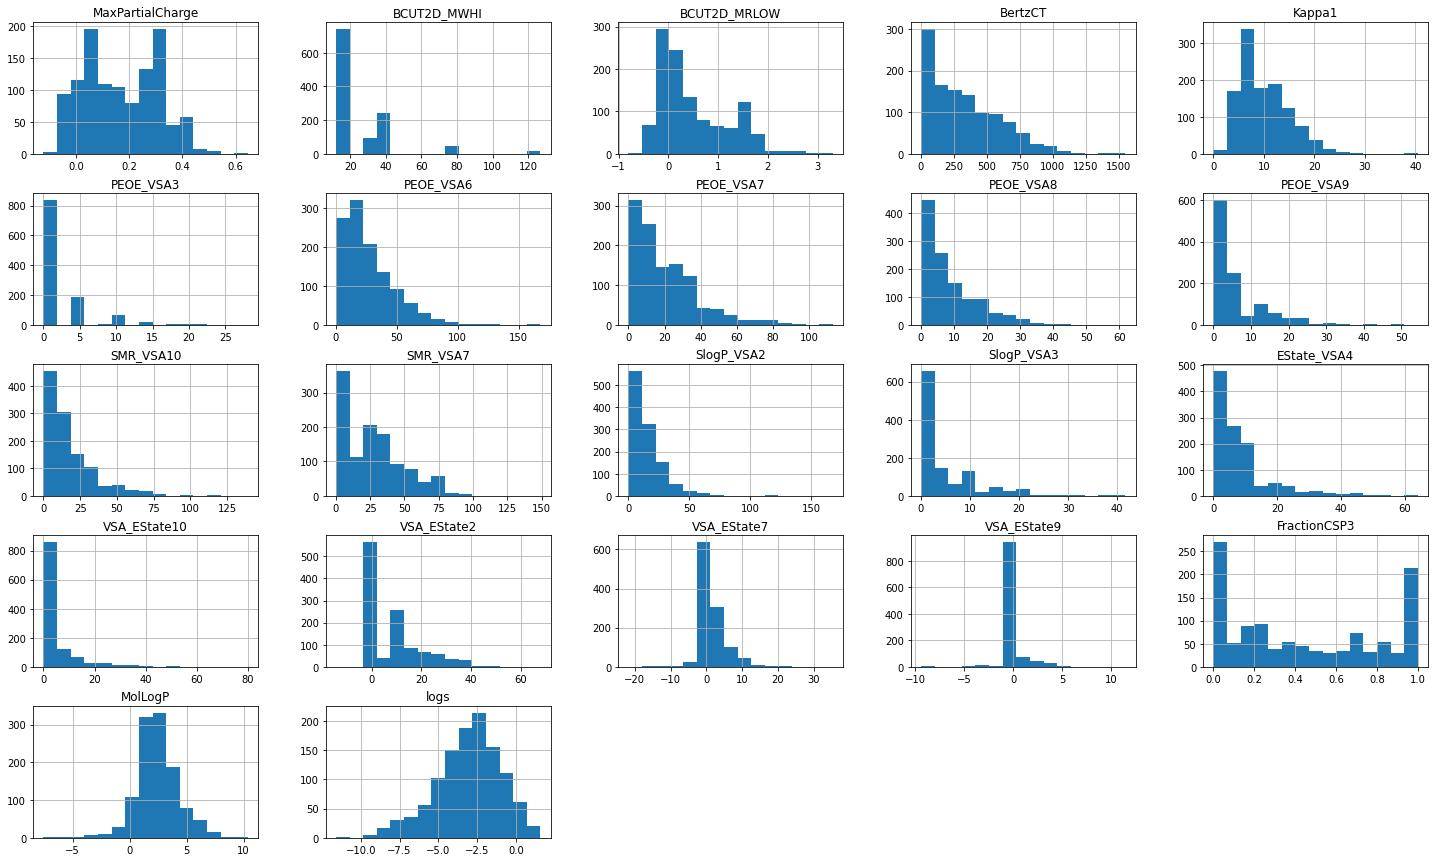

In [2]:
hist = full_df.hist(bins=15,figsize=(25, 15))

In [3]:
df = full_df.sample(frac=0.9, random_state=786)
df_unseen = full_df.drop(df.index)

df.reset_index(drop=True, inplace=True)
df_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Data for Modeling: (1030, 22)
Unseen Data For Predictions: (114, 22)


In [4]:
[i for i in df.columns if i not in ('logs')]

['MaxPartialCharge',
 'BCUT2D_MWHI',
 'BCUT2D_MRLOW',
 'BertzCT',
 'Kappa1',
 'PEOE_VSA3',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA10',
 'SMR_VSA7',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'EState_VSA4',
 'VSA_EState10',
 'VSA_EState2',
 'VSA_EState7',
 'VSA_EState9',
 'FractionCSP3',
 'MolLogP']

In [5]:
from pycaret.regression import *
reg = setup(
    df, 
    target = 'logs', 
    session_id=123, 
    train_size=0.8, 
    numeric_features=[i for i in df.columns if i not in ('logs')],
    transformation = True,
    normalize = True
)

,Description,Value
0,session_id,123
1,Target,logs
2,Original Data,"(1030, 22)"
3,Missing Values,False
4,Numeric Features,21
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(824, 21)"


In [6]:
best_top3_models = compare_models(n_select=3)
# print(best_top3_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4584,0.4141,0.6401,0.9026,0.1800,0.5099,0.4210
lightgbm,Light Gradient Boosting Machine,0.4684,0.4144,0.6413,0.9018,0.1738,0.4542,0.1350
gbr,Gradient Boosting Regressor,0.4928,0.4500,0.6684,0.8943,0.1893,0.5031,0.1880
rf,Random Forest Regressor,0.4925,0.4743,0.6856,0.8876,0.1901,0.4828,0.6370
ada,AdaBoost Regressor,0.6446,0.6751,0.8189,0.8407,0.2362,0.7245,0.1720
br,Bayesian Ridge,0.6529,0.6773,0.8206,0.8404,0.2393,0.6394,0.0400
ridge,Ridge Regression,0.6530,0.6777,0.8208,0.8403,0.2391,0.6409,0.0400
lr,Linear Regression,0.6530,0.6780,0.8210,0.8402,0.2391,0.6415,0.6770
huber,Huber Regressor,0.6501,0.6895,0.8279,0.8374,0.2433,0.6467,0.0680
knn,K Neighbors Regressor,0.6391,0.7450,0.8605,0.8228,0.2330,0.7014,0.0850


In [7]:
# lgb = create_model('lightgbm')
# tuned_lgb = tune_model(lgb, n_iter=50)

# best = create_model(best_model)
best = create_model('lightgbm', n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4948,0.4398,0.6632,0.8608,0.1644,0.4369
1,0.5540,0.5291,0.7274,0.8718,0.1856,0.4028
2,0.5068,0.4409,0.6640,0.8945,0.1654,0.2668
3,0.4780,0.4524,0.6726,0.8759,0.1757,0.2564
4,0.4130,0.2880,0.5366,0.9415,0.1433,0.1789
5,0.4458,0.3793,0.6159,0.9099,0.1703,0.2413
6,0.4977,0.5022,0.7087,0.9134,0.1828,0.6635
7,0.4700,0.3852,0.6207,0.9106,0.1781,0.4181
8,0.4056,0.3774,0.6143,0.9023,0.2053,0.4902
9,0.5036,0.4903,0.7002,0.9017,0.2250,1.4668


In [8]:
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5280,0.5027,0.7090,0.8409,0.1723,0.5935
1,0.5033,0.4793,0.6923,0.8839,0.1962,0.4001
2,0.5499,0.4708,0.6861,0.8874,0.1723,0.3510
3,0.5132,0.5362,0.7323,0.8529,0.1985,0.2842
4,0.4885,0.3934,0.6272,0.9201,0.1844,0.2390
5,0.5068,0.4690,0.6848,0.8887,0.1832,0.2931
6,0.6142,0.6103,0.7812,0.8948,0.2201,1.0236
7,0.5094,0.4289,0.6549,0.9005,0.2000,0.4561
8,0.4565,0.4684,0.6844,0.8788,0.2132,0.5255
9,0.6193,0.6524,0.8077,0.8692,0.2778,2.4825


In [9]:
# predicting labels for the test set
predict_model(tuned_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4929,0.4463,0.6681,0.9014,0.1746,0.3320


,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,BertzCT,Kappa1,PEOE_VSA3,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,...,SlogP_VSA3,EState_VSA4,VSA_EState10,VSA_EState2,VSA_EState7,VSA_EState9,FractionCSP3,MolLogP,logs,Label
0,-0.886795,-0.581488,-0.370221,-1.280562,-0.004362,-0.602252,0.287770,-0.305969,0.861641,-0.895095,...,0.626442,0.952940,-0.677352,-0.908988,0.908496,-0.144482,1.394043,0.096012,-1.850,-2.374565
1,-1.190633,-1.180687,0.902737,-1.276477,-1.376126,-0.602252,-0.978237,-0.925067,0.076147,-0.895095,...,-0.835778,0.924917,-0.677352,-0.908988,1.351391,-0.144482,0.571753,-0.553420,-1.640,-1.823694
2,-0.356549,-0.609089,-0.774131,0.962357,0.896536,-0.602252,-0.531234,2.199393,-1.132877,1.185412,...,0.888340,1.782857,-0.677352,-0.908988,0.646933,-0.144482,0.723230,0.083469,-4.955,-4.277392
3,0.990820,1.229622,-1.012473,1.509644,1.569817,-0.602252,1.658530,1.435196,-1.132877,0.546389,...,1.580013,0.800004,1.651564,0.732067,0.102868,-0.144482,-0.278685,1.934099,-6.291,-6.446121
4,-1.399093,-1.196715,1.297037,-1.333785,-1.405602,-0.602252,-0.590060,-0.925067,-1.132877,-0.895095,...,-0.835778,0.240059,-0.677352,-0.908988,0.823280,-0.144482,-0.555632,-0.371238,-2.090,-1.772832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018880,1.229667,-0.148013,0.819907,0.792771,-0.602252,1.066501,0.799352,-1.132877,1.661174,...,0.626442,0.240059,1.927981,-1.360738,0.080824,-0.144482,1.073959,1.091366,-6.290,-5.947665
202,-1.601615,-1.087209,0.160285,-1.283849,-0.552944,-0.602252,0.620677,-0.395410,-1.132877,-0.895095,...,-0.835778,0.844631,-0.677352,-0.908988,-0.009549,-0.144482,1.394043,0.142066,-4.280,-3.973298
203,-0.713711,1.228280,1.440386,1.025052,1.042898,-0.602252,1.990749,-0.368711,0.660969,1.874304,...,-0.835778,-1.069928,1.920619,-0.908988,-0.408972,-0.144482,-1.265530,2.525058,-8.600,-8.110401
204,0.787289,-0.550699,-1.684012,0.377827,0.033386,-0.602252,-1.546475,-0.293008,0.711765,1.403111,...,-0.835778,0.186061,-0.677352,1.169553,-0.408972,-0.144482,-0.749748,-0.336513,-2.820,-2.713965


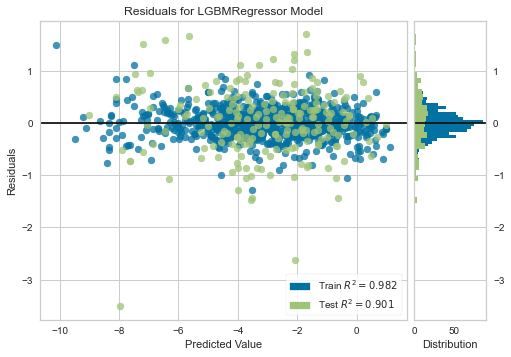

In [10]:
plot_model(tuned_best)

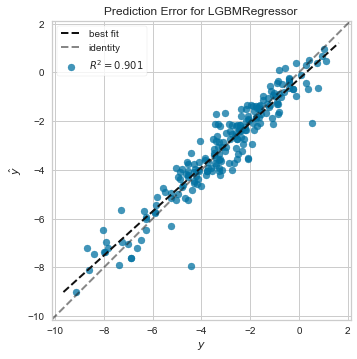

In [11]:
plot_model(tuned_best, plot='error')

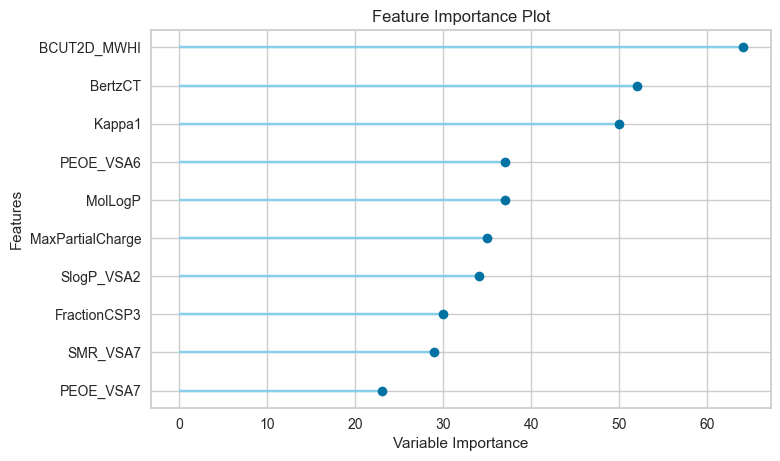

In [12]:
plot_model(tuned_best, plot='feature')

In [13]:
# train on full dataset and create the final model
final_model = finalize_model(tuned_best)
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.1924,0.0666,0.2581,0.9853,0.0849,0.1592


,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,BertzCT,Kappa1,PEOE_VSA3,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,...,SlogP_VSA3,EState_VSA4,VSA_EState10,VSA_EState2,VSA_EState7,VSA_EState9,FractionCSP3,MolLogP,logs,Label
0,-0.886795,-0.581488,-0.370221,-1.280562,-0.004362,-0.602252,0.287770,-0.305969,0.861641,-0.895095,...,0.626442,0.952940,-0.677352,-0.908988,0.908496,-0.144482,1.394043,0.096012,-1.850,-2.034845
1,-1.190633,-1.180687,0.902737,-1.276477,-1.376126,-0.602252,-0.978237,-0.925067,0.076147,-0.895095,...,-0.835778,0.924917,-0.677352,-0.908988,1.351391,-0.144482,0.571753,-0.553420,-1.640,-1.601070
2,-0.356549,-0.609089,-0.774131,0.962357,0.896536,-0.602252,-0.531234,2.199393,-1.132877,1.185412,...,0.888340,1.782857,-0.677352,-0.908988,0.646933,-0.144482,0.723230,0.083469,-4.955,-4.646206
3,0.990820,1.229622,-1.012473,1.509644,1.569817,-0.602252,1.658530,1.435196,-1.132877,0.546389,...,1.580013,0.800004,1.651564,0.732067,0.102868,-0.144482,-0.278685,1.934099,-6.291,-6.239954
4,-1.399093,-1.196715,1.297037,-1.333785,-1.405602,-0.602252,-0.590060,-0.925067,-1.132877,-0.895095,...,-0.835778,0.240059,-0.677352,-0.908988,0.823280,-0.144482,-0.555632,-0.371238,-2.090,-2.092519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018880,1.229667,-0.148013,0.819907,0.792771,-0.602252,1.066501,0.799352,-1.132877,1.661174,...,0.626442,0.240059,1.927981,-1.360738,0.080824,-0.144482,1.073959,1.091366,-6.290,-6.256551
202,-1.601615,-1.087209,0.160285,-1.283849,-0.552944,-0.602252,0.620677,-0.395410,-1.132877,-0.895095,...,-0.835778,0.844631,-0.677352,-0.908988,-0.009549,-0.144482,1.394043,0.142066,-4.280,-4.111535
203,-0.713711,1.228280,1.440386,1.025052,1.042898,-0.602252,1.990749,-0.368711,0.660969,1.874304,...,-0.835778,-1.069928,1.920619,-0.908988,-0.408972,-0.144482,-1.265530,2.525058,-8.600,-8.367751
204,0.787289,-0.550699,-1.684012,0.377827,0.033386,-0.602252,-1.546475,-0.293008,0.711765,1.403111,...,-0.835778,0.186061,-0.677352,1.169553,-0.408972,-0.144482,-0.749748,-0.336513,-2.820,-2.591698


In [14]:
unseen_predictions = predict_model(final_model, data=df_unseen)
unseen_predictions

,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,BertzCT,Kappa1,PEOE_VSA3,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,...,SlogP_VSA3,EState_VSA4,VSA_EState10,VSA_EState2,VSA_EState7,VSA_EState9,FractionCSP3,MolLogP,logs,Label
0,0.104589,35.539166,1.387534,8.754888,4.580000,0.000000,0.000000,6.923737,0.000000,0.000000,...,0.000000,0.000000,10.080247,-0.222222,0.000000,0.000000,1.000000,1.81000,-1.290,-1.140979
1,0.154255,16.675371,-0.122813,39.793194,7.920000,0.000000,0.000000,20.771212,13.213764,0.000000,...,9.473726,13.213764,0.000000,0.000000,-0.037037,0.000000,1.000000,1.40540,-0.430,-0.429935
2,0.032898,79.922000,1.506933,205.919883,9.229767,0.000000,0.000000,75.852510,17.890878,0.000000,...,0.000000,17.890878,13.529815,0.000000,0.000000,0.000000,0.000000,4.73660,-6.980,-4.697492
3,0.060661,35.499014,1.704597,219.543000,7.200011,0.000000,34.802820,18.199101,5.022633,10.045267,...,0.000000,0.000000,16.761481,0.000000,0.000000,0.000000,0.000000,3.64680,-3.590,-4.054611
4,-0.039755,13.931090,1.322148,160.800515,6.341655,0.000000,34.889456,20.771212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,2.61186,-3.400,-3.216557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.241599,32.092047,-0.147378,307.946252,13.096534,0.000000,27.192033,30.977423,0.000000,0.000000,...,9.589074,12.841643,4.797601,24.049915,2.295448,0.000000,0.727273,1.34990,-3.360,-3.111525
110,0.118789,16.255418,0.464180,251.049732,8.119800,0.000000,25.980209,30.034913,0.000000,0.000000,...,0.000000,11.126903,0.000000,0.000000,0.000000,0.000000,0.400000,2.82402,-2.220,-2.389812
111,0.281950,35.539345,0.189699,267.237707,16.430000,0.000000,46.564705,27.694949,17.836535,5.032286,...,0.000000,11.761885,17.836171,13.663351,0.000000,0.000000,0.700000,4.84390,-4.880,-4.952471
112,0.362333,35.582521,0.176285,183.232219,12.980000,0.000000,34.802820,0.000000,14.219595,0.000000,...,13.612543,14.219595,15.822569,0.000000,0.000000,-1.559576,1.000000,2.16090,-0.220,-2.633336


In [15]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.logs, unseen_predictions.Label, 'R2'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'MAE'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'RMSE')

(0.8481, 0.5969, 0.6185)

In [16]:
# Improving the model using ensemble techniques
bagged_dt = ensemble_model(tuned_best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4866,0.4250,0.6520,0.8655,0.1610,0.5820
1,0.5186,0.5263,0.7255,0.8725,0.1975,0.3994
2,0.5105,0.4521,0.6724,0.8918,0.1668,0.4283
3,0.4328,0.3867,0.6219,0.8939,0.1683,0.2236
4,0.4521,0.3444,0.5869,0.9300,0.1602,0.2145
5,0.5121,0.4607,0.6787,0.8906,0.1729,0.3299
6,0.5757,0.6082,0.7799,0.8952,0.2086,0.7711
7,0.4619,0.3628,0.6023,0.9158,0.1714,0.4520
8,0.4075,0.4150,0.6442,0.8926,0.2128,0.4892
9,0.5049,0.4426,0.6653,0.9113,0.2326,1.8519


In [17]:
boosted_dt = ensemble_model(tuned_best, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5035,0.4425,0.6652,0.8600,0.1656,0.3814
1,0.5398,0.5182,0.7198,0.8745,0.1957,0.4163
2,0.5282,0.4613,0.6792,0.8896,0.1592,0.2763
3,0.4402,0.3959,0.6292,0.8914,0.1593,0.2277
4,0.4840,0.3648,0.6040,0.9259,0.1610,0.2203
5,0.4513,0.3621,0.6018,0.9140,0.1609,0.3137
6,0.5294,0.4881,0.6986,0.9159,0.1938,0.4520
7,0.4675,0.4021,0.6341,0.9067,0.1768,0.3863
8,0.4259,0.4731,0.6879,0.8776,0.2255,0.5619
9,0.5517,0.5893,0.7677,0.8819,0.2430,1.4671


In [18]:
bagged_dt2 = ensemble_model(tuned_best, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4626,0.3883,0.6231,0.8771,0.1526,0.3944
1,0.5082,0.4905,0.7003,0.8812,0.1906,0.3889
2,0.4916,0.4120,0.6419,0.9014,0.1563,0.2940
3,0.4220,0.3688,0.6073,0.8989,0.1667,0.2193
4,0.4303,0.3180,0.5639,0.9354,0.1553,0.2035
5,0.4741,0.3978,0.6307,0.9055,0.1636,0.3282
6,0.5474,0.5312,0.7289,0.9084,0.1968,0.6315
7,0.4553,0.3508,0.5923,0.9186,0.1686,0.4245
8,0.4123,0.4234,0.6507,0.8904,0.2143,0.5230
9,0.5078,0.4666,0.6831,0.9065,0.2334,1.5802


In [19]:
boosted_dt2 = ensemble_model(tuned_best, method='Boosting', n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5020,0.4197,0.6478,0.8672,0.1654,0.3640
1,0.5336,0.4741,0.6886,0.8852,0.1949,0.4280
2,0.4801,0.3948,0.6284,0.9055,0.1491,0.2674
3,0.4549,0.4261,0.6528,0.8831,0.1751,0.2396
4,0.4401,0.3196,0.5653,0.9351,0.1514,0.2024
5,0.4844,0.3948,0.6283,0.9063,0.1629,0.3350
6,0.5385,0.4997,0.7069,0.9139,0.1960,0.5082
7,0.4808,0.3813,0.6175,0.9115,0.1699,0.4076
8,0.4286,0.4367,0.6608,0.8870,0.2255,0.5641
9,0.5422,0.5384,0.7338,0.8921,0.2422,1.4254


In [20]:
# train individual models to blend
# can I tune them before blending?
lightgbm = create_model('lightgbm', verbose=False)
et = create_model('et', verbose=False)
rf = create_model('rf', verbose=False)

In [21]:
blender = blend_models(estimator_list = [lightgbm, et, rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4352,0.3797,0.6162,0.8798,0.1559,0.3930
1,0.5272,0.4910,0.7007,0.8811,0.1922,0.4512
2,0.4665,0.3819,0.6180,0.9086,0.1442,0.2500
3,0.4476,0.4111,0.6412,0.8872,0.1632,0.2368
4,0.4000,0.2750,0.5245,0.9441,0.1388,0.1723
5,0.4412,0.3814,0.6176,0.9095,0.1639,0.2509
6,0.4964,0.4641,0.6813,0.9200,0.1862,0.5532
7,0.4480,0.3459,0.5881,0.9198,0.1700,0.4265
8,0.3822,0.3932,0.6271,0.8982,0.2026,0.4804
9,0.5398,0.5515,0.7426,0.8895,0.2357,1.4784


In [22]:
final_model = finalize_model(blender)
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0978,0.0199,0.1410,0.9956,0.0472,0.0735


,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,BertzCT,Kappa1,PEOE_VSA3,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,...,SlogP_VSA3,EState_VSA4,VSA_EState10,VSA_EState2,VSA_EState7,VSA_EState9,FractionCSP3,MolLogP,logs,Label
0,-0.886795,-0.581488,-0.370221,-1.280562,-0.004362,-0.602252,0.287770,-0.305969,0.861641,-0.895095,...,0.626442,0.952940,-0.677352,-0.908988,0.908496,-0.144482,1.394043,0.096012,-1.850,-2.028879
1,-1.190633,-1.180687,0.902737,-1.276477,-1.376126,-0.602252,-0.978237,-0.925067,0.076147,-0.895095,...,-0.835778,0.924917,-0.677352,-0.908988,1.351391,-0.144482,0.571753,-0.553420,-1.640,-1.645419
2,-0.356549,-0.609089,-0.774131,0.962357,0.896536,-0.602252,-0.531234,2.199393,-1.132877,1.185412,...,0.888340,1.782857,-0.677352,-0.908988,0.646933,-0.144482,0.723230,0.083469,-4.955,-4.619308
3,0.990820,1.229622,-1.012473,1.509644,1.569817,-0.602252,1.658530,1.435196,-1.132877,0.546389,...,1.580013,0.800004,1.651564,0.732067,0.102868,-0.144482,-0.278685,1.934099,-6.291,-6.399493
4,-1.399093,-1.196715,1.297037,-1.333785,-1.405602,-0.602252,-0.590060,-0.925067,-1.132877,-0.895095,...,-0.835778,0.240059,-0.677352,-0.908988,0.823280,-0.144482,-0.555632,-0.371238,-2.090,-2.137436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018880,1.229667,-0.148013,0.819907,0.792771,-0.602252,1.066501,0.799352,-1.132877,1.661174,...,0.626442,0.240059,1.927981,-1.360738,0.080824,-0.144482,1.073959,1.091366,-6.290,-6.185720
202,-1.601615,-1.087209,0.160285,-1.283849,-0.552944,-0.602252,0.620677,-0.395410,-1.132877,-0.895095,...,-0.835778,0.844631,-0.677352,-0.908988,-0.009549,-0.144482,1.394043,0.142066,-4.280,-4.186963
203,-0.713711,1.228280,1.440386,1.025052,1.042898,-0.602252,1.990749,-0.368711,0.660969,1.874304,...,-0.835778,-1.069928,1.920619,-0.908988,-0.408972,-0.144482,-1.265530,2.525058,-8.600,-8.527445
204,0.787289,-0.550699,-1.684012,0.377827,0.033386,-0.602252,-1.546475,-0.293008,0.711765,1.403111,...,-0.835778,0.186061,-0.677352,1.169553,-0.408972,-0.144482,-0.749748,-0.336513,-2.820,-2.747061


In [23]:
unseen_predictions = predict_model(final_model, data=df_unseen)
check_metric(unseen_predictions.logs, unseen_predictions.Label, 'R2'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'MAE'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'RMSE')

(0.8843, 0.4522, 0.4712)

In [24]:
stacker = stack_models(best_top3_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4398,0.3819,0.6180,0.8791,0.1540,0.2782
1,0.5286,0.4752,0.6894,0.8849,0.1989,0.4649
2,0.4716,0.3828,0.6187,0.9084,0.1513,0.3457
3,0.3909,0.3075,0.5546,0.9156,0.1373,0.2125
4,0.4077,0.2812,0.5303,0.9429,0.1476,0.1963
5,0.4517,0.3592,0.5993,0.9147,0.1674,0.2809
6,0.5226,0.4702,0.6857,0.9190,0.1908,0.7690
7,0.4689,0.3528,0.5940,0.9182,0.1689,0.3961
8,0.4016,0.3942,0.6279,0.8980,0.2060,0.4939
9,0.5125,0.4693,0.6851,0.9059,0.2188,1.2600


In [25]:
final_model = finalize_model(stacker)
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.1333,0.0313,0.1770,0.9931,0.0622,0.1006


,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,BertzCT,Kappa1,PEOE_VSA3,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,...,SlogP_VSA3,EState_VSA4,VSA_EState10,VSA_EState2,VSA_EState7,VSA_EState9,FractionCSP3,MolLogP,logs,Label
0,-0.886795,-0.581488,-0.370221,-1.280562,-0.004362,-0.602252,0.287770,-0.305969,0.861641,-0.895095,...,0.626442,0.952940,-0.677352,-0.908988,0.908496,-0.144482,1.394043,0.096012,-1.850,-1.855294
1,-1.190633,-1.180687,0.902737,-1.276477,-1.376126,-0.602252,-0.978237,-0.925067,0.076147,-0.895095,...,-0.835778,0.924917,-0.677352,-0.908988,1.351391,-0.144482,0.571753,-0.553420,-1.640,-1.650233
2,-0.356549,-0.609089,-0.774131,0.962357,0.896536,-0.602252,-0.531234,2.199393,-1.132877,1.185412,...,0.888340,1.782857,-0.677352,-0.908988,0.646933,-0.144482,0.723230,0.083469,-4.955,-4.567109
3,0.990820,1.229622,-1.012473,1.509644,1.569817,-0.602252,1.658530,1.435196,-1.132877,0.546389,...,1.580013,0.800004,1.651564,0.732067,0.102868,-0.144482,-0.278685,1.934099,-6.291,-6.601302
4,-1.399093,-1.196715,1.297037,-1.333785,-1.405602,-0.602252,-0.590060,-0.925067,-1.132877,-0.895095,...,-0.835778,0.240059,-0.677352,-0.908988,0.823280,-0.144482,-0.555632,-0.371238,-2.090,-2.121426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018880,1.229667,-0.148013,0.819907,0.792771,-0.602252,1.066501,0.799352,-1.132877,1.661174,...,0.626442,0.240059,1.927981,-1.360738,0.080824,-0.144482,1.073959,1.091366,-6.290,-6.143054
202,-1.601615,-1.087209,0.160285,-1.283849,-0.552944,-0.602252,0.620677,-0.395410,-1.132877,-0.895095,...,-0.835778,0.844631,-0.677352,-0.908988,-0.009549,-0.144482,1.394043,0.142066,-4.280,-4.266251
203,-0.713711,1.228280,1.440386,1.025052,1.042898,-0.602252,1.990749,-0.368711,0.660969,1.874304,...,-0.835778,-1.069928,1.920619,-0.908988,-0.408972,-0.144482,-1.265530,2.525058,-8.600,-8.621841
204,0.787289,-0.550699,-1.684012,0.377827,0.033386,-0.602252,-1.546475,-0.293008,0.711765,1.403111,...,-0.835778,0.186061,-0.677352,1.169553,-0.408972,-0.144482,-0.749748,-0.336513,-2.820,-2.965900


In [26]:
unseen_predictions = predict_model(final_model, data=df_unseen)
check_metric(unseen_predictions.logs, unseen_predictions.Label, 'R2'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'MAE'), check_metric(unseen_predictions.logs, unseen_predictions.Label, 'RMSE')

(0.8874, 0.4558, 0.4587)

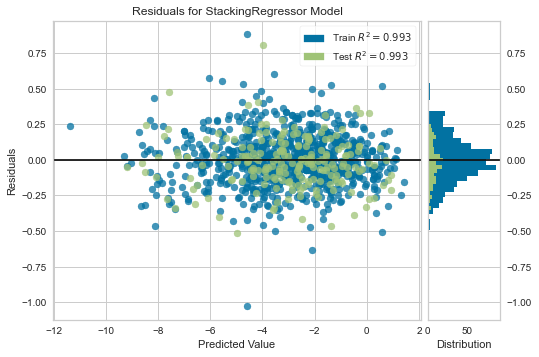

In [27]:
plot_model(final_model)

In [28]:
save_model(final_model,'sol_pred_model_vsa')
saved_final_model = load_model('sol_pred_model_vsa')
new_prediction = predict_model(saved_final_model, data=df_unseen)

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded
